[Elementary Differential Equations with Boundary Value Problems - William F. Trench - Trinity University](https://digitalcommons.trinity.edu/mono/9/)

Chapter 1
* Exercise 1.2.1

Tutors & References
* Anthropic's AI Claude
* Wolfram Alpha
* Wikipedia

Given:
* Circle x^2 + y^2 = a^2,
* Where a is any positive constant

Find:
* Show that the circle is an integral curve of y' = x/y

Assume:
*  An integral curve is a parametric curve that represents a specific solution to an ordinary differential equation or system of equation
* A parametric curve is a normal curve where we choose to define the curve's x and y values in terms of another variable for simplicity or elegance

Solution:

* We need to demonstrate that if we differentiate the circle equation implicitly with respect to x, we'll get the given differential equation.

* Differentiate x^2 + y^2 = a^2 implicitly with respect to x:
   
   * 2x + 2y(dy/dx) = 0

* Rearrange this equation:
   
   * 2y(dy/dx) = -2x
   
   * dy/dx = -x/y

* Now, we have dy/dx = -x/y, but our target equation is y' = x/y. The negative sign is the key here.

* Remember that for a circle, as x increases, y decreases in the upper half of the circle, and as x decreases, y increases in the lower half. This means that dy/dx is indeed the negative of y'.

* Therefore, y' = -dy/dx = -(-x/y) = x/y

Thus, we've shown that the circle x^2 + y^2 = a^2 satisfies the differential equation y' = x/y, making it an integral curve of this equation.

This result is interesting because it shows that the solutions to the differential equation y' = x/y are circles centered at the origin. The constant 'a' determines the radius of each particular solution.


<ipython-input-1-cc3b47515706>:39: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  return odeint(dy_dx, y0, x)


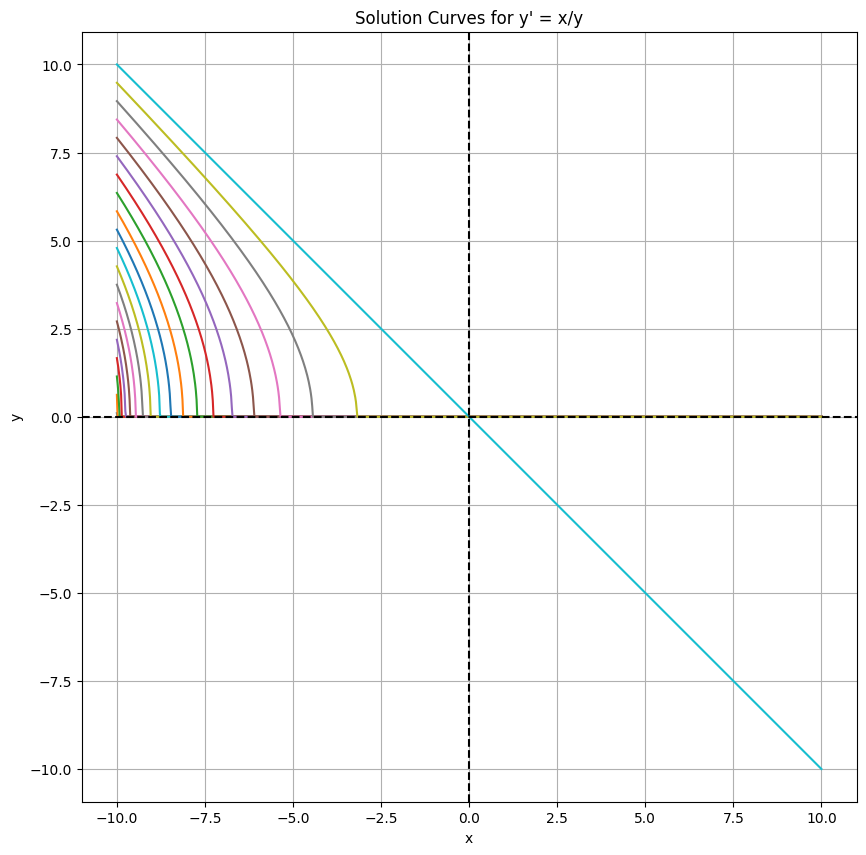

In [1]:
# Abstract:
# This script visualizes solution curves for the differential equation y' = x/y.
# It uses numerical methods to approximate solutions and plots multiple curves
# corresponding to different initial conditions. The resulting plot demonstrates
# that the solutions are circles centered at the origin, as expected from the
# analytical solution x^2 + y^2 = a^2, where 'a' is determined by the initial condition.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dy_dx(y, x):
    """
    Define the differential equation y' = x/y.

    Args:
    y (float): The y-value at the current point.
    x (float): The x-value at the current point.

    Returns:
    float: The derivative dy/dx at the given point.
    """
    # Avoid division by zero
    if y == 0:
        return np.inf
    return x / y

def solve_ode(y0, x):
    """
    Solve the ODE for a given initial condition.

    Args:
    y0 (float): The initial y-value.
    x (ndarray): Array of x-values to solve over.

    Returns:
    ndarray: Array of y-values corresponding to the solution.
    """
    return odeint(dy_dx, y0, x)

# Set up the x-range for solving the ODE
x = np.linspace(-10, 10, 1000)

# Create a new figure
plt.figure(figsize=(10, 10))

# Solve and plot for multiple initial conditions
for y0 in np.linspace(0.1, 10, 20):
    y = solve_ode(y0, x)
    plt.plot(x, y, label=f'y(0) = {y0:.1f}')

# Plot settings
plt.title("Solution Curves for y' = x/y")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.axis('equal')  # This ensures that the circles appear as circles

# Show the plot
plt.show()

In [ ]:
# Abstract:
# This script visualizes solution curves for the differential equation y' = x/y.
# It uses numerical methods to approximate solutions and plots multiple curves
# corresponding to different initial conditions. The script has been improved to
# handle the singularity at y=0 and uses a more robust solver.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dy_dx(x, y):
    """
    Define the differential equation y' = x/y with handling for y near zero.

    Args:
    x (float): The x-value at the current point.
    y (float): The y-value at the current point.

    Returns:
    float: The derivative dy/dx at the given point.
    """
    if abs(y) < 1e-10:  # Avoid division by very small numbers
        return np.sign(x) * 1e10  # Return a large value with appropriate sign
    return x / y

def solve_ode(y0, x_span):
    """
    Solve the ODE for a given initial condition using solve_ivp.

    Args:
    y0 (float): The initial y-value.
    x_span (tuple): The range of x-values to solve over (start, end).

    Returns:
    tuple: Arrays of x-values and y-values corresponding to the solution.
    """
    solution = solve_ivp(dy_dx, x_span, [y0], dense_output=True, method='RK45')
    return solution.t, solution.y[0]

# Set up the x-range for solving the ODE
x_span = (-10, 10)
x_plot = np.linspace(*x_span, 1000)

# Create a new figure
plt.figure(figsize=(10, 10))

# Solve and plot for multiple initial conditions
for y0 in np.linspace(0.1, 10, 20):
    x, y = solve_ode(y0, x_span)
    y_plot = solve_ivp(dy_dx, x_span, [y0], t_eval=x_plot).y[0]
    plt.plot(x_plot, y_plot, label=f'y(0) = {y0:.1f}')

# Plot settings
plt.title("Solution Curves for y' = x/y")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.axis('equal')  # This ensures that the circles appear as circles

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dy_dx(x, y):
    """Define the differential equation y' = x/y with handling for y near zero."""
    if abs(y) < 1e-10:
        return np.sign(x) * 1e10
    return x / y

def solve_ode(y0, x_span):
    """Solve the ODE for a given initial condition."""
    solution = solve_ivp(dy_dx, x_span, [y0], dense_output=True, method='RK45',
                         rtol=1e-3, atol=1e-6)  # Relaxed tolerances
    return solution.t, solution.y[0]

# Set up the x-range for solving the ODE
x_span = (-5, 5)  # Reduced range
x_plot = np.linspace(*x_span, 200)  # Fewer points

# Create a new figure
plt.figure(figsize=(10, 10))

# Solve and plot for fewer initial conditions
for y0 in np.linspace(0.5, 5, 10):  # Reduced number of initial conditions
    _, y = solve_ode(y0, x_span)
    y_plot = y(x_plot)  # Use the dense output for plotting
    plt.plot(x_plot, y_plot, label=f'y(0) = {y0:.1f}')

# Plot settings
plt.title("Solution Curves for y' = x/y")
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.grid(True)
plt.axis('equal')

# Disable legend to speed up rendering
# plt.legend()

plt.show()

print("Plot generation complete. If you don't see a plot, please check your output settings.")